CW done: I deserve a good mark


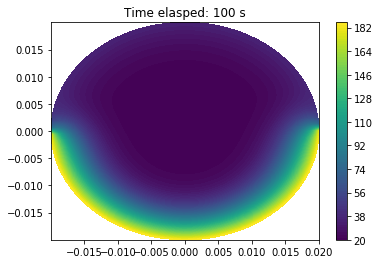

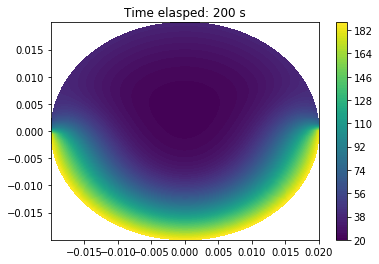

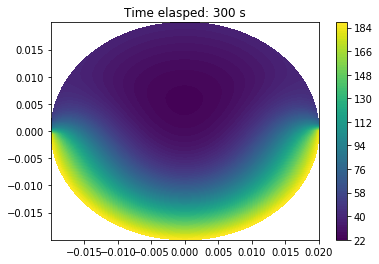

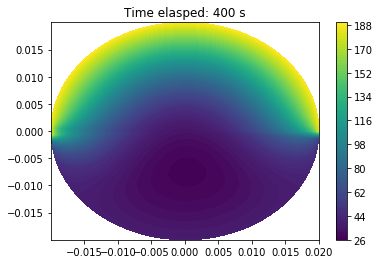

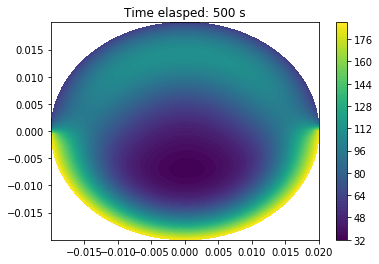

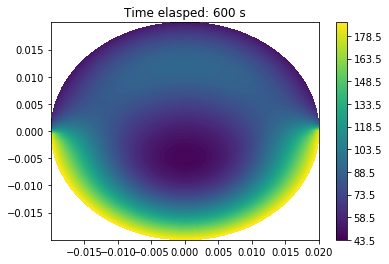

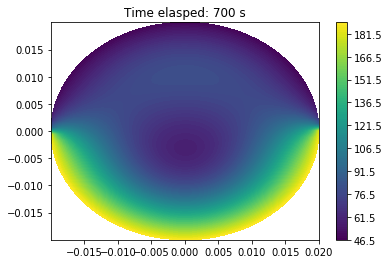

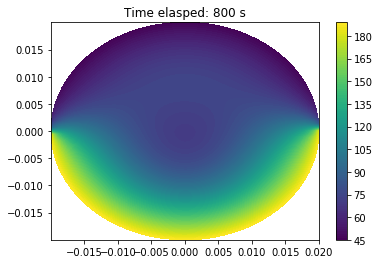

In [122]:
## In this section I am importing all the libraries I will need
import numpy as np
import matplotlib.pyplot as plt

# In this section I am setting the domain of solution and the discretised grid

#Radius of cross-section of donut
R = 0.02
r = np.linspace(0, R, 50)
theta = np.linspace(0, 2*np.pi, 100)

#Setting up meshgrid, converting polar into cartesian
theta_matrix, radius_matrix = np.meshgrid(theta,r)
X = radius_matrix * np.cos(theta_matrix)
Y = radius_matrix * np.sin(theta_matrix)

# In this section I am defining arrays I would need (if neeeded)

#Temperature distribution array
T = np.zeros((len(r), len(theta)))
#Temperature distribution at the next time step
Tp = np.zeros(T.shape) 

dr = r[1]-r[0]
dth = theta[1]-theta[0]

#Choosing a time step according to the convergence criteria
dt = 0.001 #s

#Array of radii
rad = np.zeros(T.shape)
for i in range(len(r)):
    rad[i,:] = r[i]

# In this section I am setting the boundary conditions/initial values
#Defining constants:
alph = 1e-7 #m2/s
h_air = 50 #W/m2K
h_oil = 400 #W/m2K
Tinf_air = 40 #Celcius
Tinf_oil = 190 #Celsius
density = 350 #kg/m3
c = 2000 #J/kg

#Array of convection coefficients
h = np.zeros(T.shape)
#Array of fluid temperatures
Tinf = np.zeros(T.shape)

#Defining the point in the array where the air ends
for i in range(len(theta)):
    n = i 
    if theta[i] >= np.pi:
        break

#Initial temperature of donut
T[:,:] = 20 

#Air on top half, oil on bottom half (with theta = 0 and 2pi also oil)
h[-1,:n] = h_air
h[-1,n:] = h_oil
h[-1,0] = h_oil

Tinf[-1,:n] = Tinf_air
Tinf[-1,n:] = Tinf_oil
Tinf[-1,0] = Tinf_oil

#Defining constants for finite difference methods
#lengths used for CV analysis

L1 = dth*R #outer arc length of CV
L2 = dth*(R-dr/2) #inner arc length of CV
L3 = dr/2 #top length
A = 0.5*dth*(R**2-(R-dr/2)**2) #area of CV

#Constants for convection:
B1 = L1*dt/density/c/A
B2 = alph*L2*dt/A/dr
B3 = alph*L3*dt/A/dth/R

#Constants for heat diffusion:
C1 = alph*dt/dr
C2 = alph*dt/dr**2
C3 = alph*dt/dth**2

# In this section I am implementing the numerical method
# Number of time steps
N = 800000

#array of times to when the plots would be made
times = np.linspace(0, N, 9)
#List to keep temperature distributions
Tplot = []


for t in range(1, N+1):
    #Convective heat transfer
    #Determining surface temperature from convective heat transfer
    Tp[-1,1:-1] = T[-1,1:-1] + B1*h[-1,1:-1]*(Tinf[-1,1:-1] - T[-1,1:-1]) + B2*(T[-2,1:-1]-T[-1,1:-1]) + \
    B3*(T[-1,2:] - 2*T[-1,1:-1] + T[-1,:-2])
    #Case for when theta = 0, using sysmmetry
    Tp[-1,0] = T[-1,0] + B1*h[-1,0]*(Tinf[-1,0] - T[-1,0]) + B2*(T[-2,0]-T[-1,0]) + B3*(T[-1,1] - 2*T[-1,0] + T[-1,-2])
    #Case for when theta = 2pi
    Tp[-1,-1] = Tp[-1,0]
    
    #Heat diffusion within donut
    Tp[1:-1, 1:-1] = T[1:-1,1:-1] + C1/rad[1:-1,1:-1]*(T[2:,1:-1]-T[1:-1,1:-1]) + \
    C2*(T[2:,1:-1]-2*T[1:-1,1:-1]+T[:-2,1:-1]) + \
    C3/(rad[1:-1,1:-1]**2)*(T[1:-1,2:]-2*T[1:-1,1:-1]+T[1:-1,:-2])
    
    #Accounting for theta = 0
    Tp[1:-1,0] = T[1:-1,0] + C1/rad[1:-1,0]*(T[2:,0]-T[1:-1,0]) + \
    C2*(T[2:,0]-2*T[1:-1,0]+T[:-2,0]) + \
    C3/(rad[1:-1,0]**2)*(T[1:-1,1]-2*T[1:-1,0]+T[1:-1,-2])
    
    #Accounting for theta = 2pi
    Tp[1:-1,-1] =T[1:-1,0] 
  
    #Accounting for r = 0
    Tp[0, :] = np.average(T[1,:])
    
    #Flipping donut at half way (shifting all theta values)
    if t == N/2:
        m = int(len(theta)/2)
        Tnew = np.copy(Tp)
        for i in range(len(theta)-1):
            Tp[:,i] = Tnew[:,i-m]
    
    #Setting T as the new temperature gradient for next time step
    T = np.copy(Tp)
    
    #Adding time plots at specific times to a list
    for i in range(1, len(times)):
        if t == int(times[i]):
            Tplot += [T]
            
        
# In this section I am showing the results
# Plotting results for the different time steps
for i in range (len(Tplot)):
    plt.figure(i)
    plt.contourf(X,Y,Tplot[i],100)
    plt.colorbar()
    label = 'Time elasped: ' + str(int(times[i+1]*dt)) + ' s'
    plt.title(label)
    plt.show


# In this section I am celebrating
print('CW done: I deserve a good mark')

#Convergence criterion for dt for convection PDE
#1/(h[-1]*L1/density/c/A + alph*L2/A/dr + 2*alph*L3/A/dth/R)
#Convergence criterion for dt for diffusion PDE
#1/(1/r[1:]*(alph/dr) + 2*alph/(dr**2) + 2/(r[1:]**2)*(alph/(dth**2)))